In [3]:
import cv2 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
# import seaborn as sns

# 画像用意

In [10]:
goldenretriever_path = "./data/goldenretriever.jpg"
img1 = cv2.imread(goldenretriever_path)
# cv2.imshow(img1)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img1_rgb_rotate_90_clockwise = cv2.rotate(img1_rgb, cv2.ROTATE_90_CLOCKWISE)


img1 = img1_rgb
img2 = img1_rgb_rotate_90_clockwise

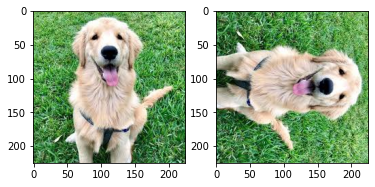

In [11]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(img1)
ax[1].imshow(img2)

# AKAZEサンプル実装



54


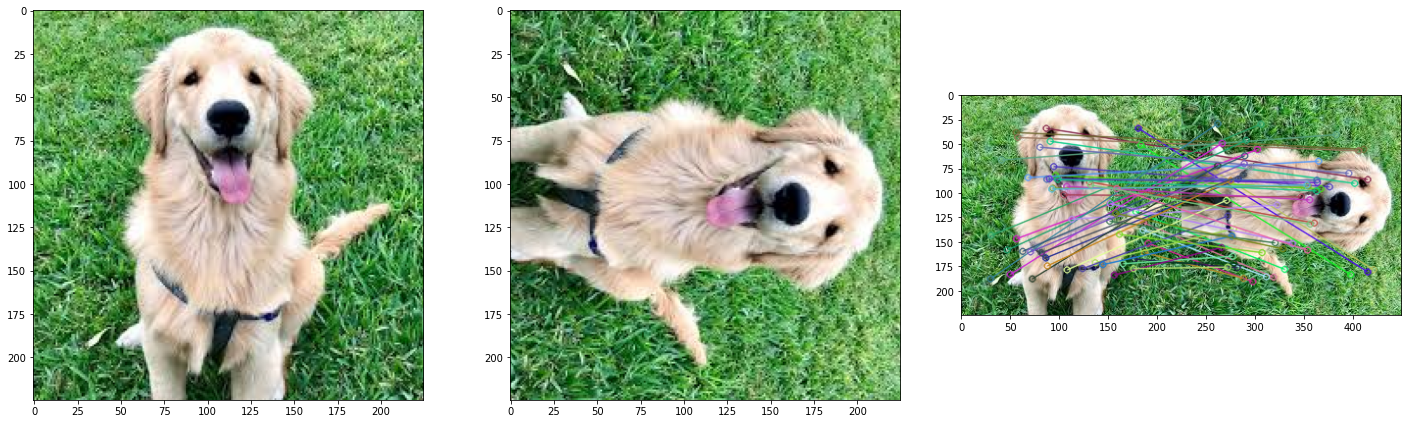

A-KAZE Matching Results
************************************************************
# Ratio:                             	 0.2
# Keypoints 1:                       	 194
# Keypoints 2:                       	 194
# Matches:                           	 54


In [17]:
# 検出器
akaze = cv2.AKAZE_create()

# kp: keypoints, des: descriptors
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Forceで特徴量同士のマッチングを実施
bf = cv2.BFMatcher()
## 特徴量ベクトル同士をKNNでマッチングさせる
matches = bf.knnMatch(des1, des2, k=2)


ratio = 0.2
good = []
matched1 = []
matched2 = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        # print([m])
        good.append([m])
        matched1.append(kp1[m.queryIdx])
        matched2.append(kp2[m.trainIdx])

print(len(good))

# 対応する特徴点同士を描画する
img_matchpoint = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)


img_list = [img1, img2, img_matchpoint]

fig, ax = plt.subplots(1, len(img_list), figsize=(20,6))
for i in range(len(img_list)):
    ax[i].imshow(img_list[i])
plt.tight_layout()
plt.show()

print("A-KAZE Matching Results")
print("*"*60)
print("# Ratio:                             \t", ratio)
print("# Keypoints 1:                       \t", len(kp1))
print("# Keypoints 2:                       \t", len(kp2))
print("# Matches:                           \t", len(matched1))
# print("# Matches (2):                           \t", len(matched2))/
